In [ ]:
# License Plate Detection using OpenCV and Haar Cascade Classifier



In [36]:
# Import necessary packages
import cv2
import matplotlib.pyplot as plt
import os

In [37]:
# Load Haar Cascade for Russian license plates
plate_cascade = cv2.CascadeClassifier("C:/Users/priya/Documents/DIPT/workshop 4/haarcascade_russian_plate_number.xml")

In [38]:
# Load Input Images
image_files = ["car1.jpg", "car2.jpg", "car3.jpg"]  # Replace with your images
images = [cv2.imread(file) for file in image_files]

In [39]:
# Function to display image using Matplotlib
def show_image(img, title="Image"):
    plt.figure(figsize=(8,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

In [40]:
# Function for preprocessing (optional)
def preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Histogram equalization
    gray = cv2.equalizeHist(gray)
    # Optional: Gaussian blur
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    return gray

In [41]:
# License Plate Detection Function
def detect_license_plate(img, scaleFactor=1.1, minNeighbors=4, minSize=(30,30)):
    # Preprocess image
    gray = preprocess_image(img)
    
    # Detect plates
    plates = plate_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, 
                                            minNeighbors=minNeighbors, minSize=minSize)
    
    img_copy = img.copy()
    cropped_plates = []

    # Draw rectangles and save cropped plates
    for (x, y, w, h) in plates:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 3)
        cropped_plate = img[y:y+h, x:x+w]
        cropped_plates.append(cropped_plate)
    
    return img_copy, cropped_plates, len(plates)

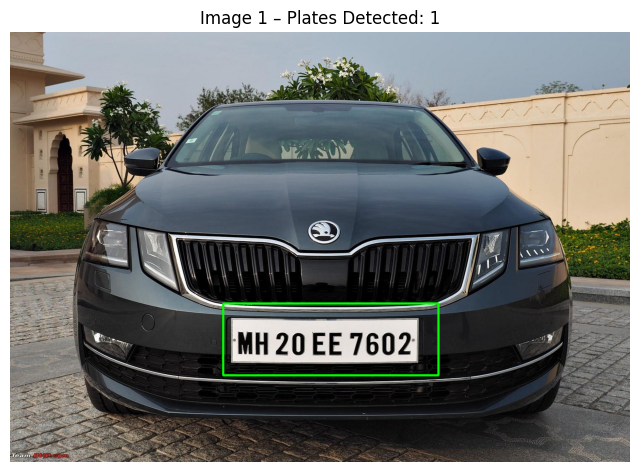

Cropped plate saved as: detected_plate_1_1.jpg


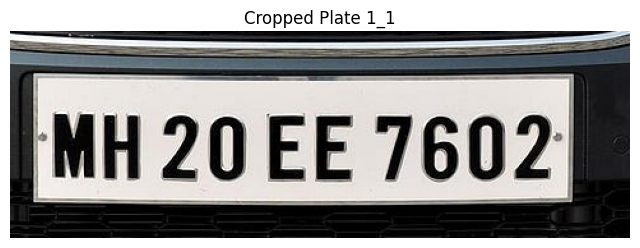

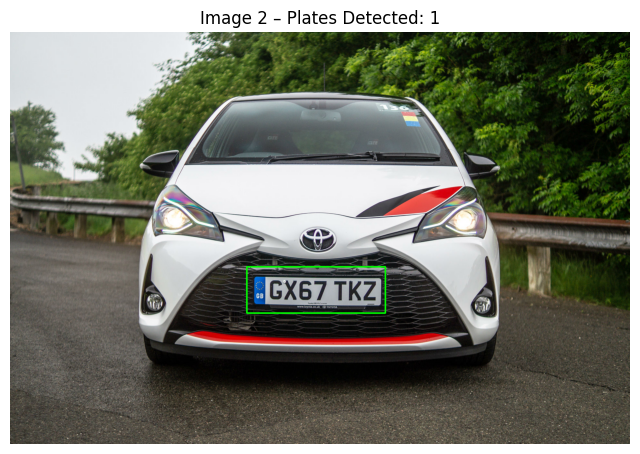

Cropped plate saved as: detected_plate_2_1.jpg


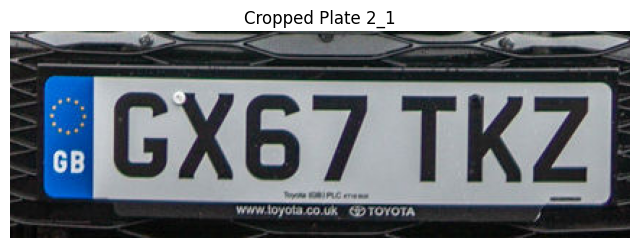

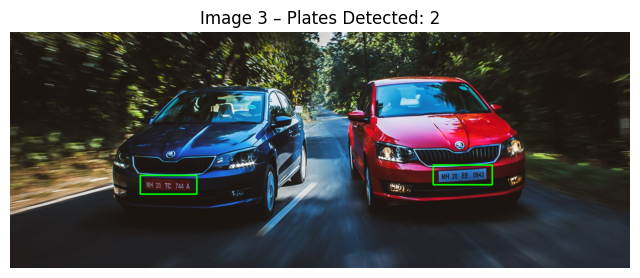

Cropped plate saved as: detected_plate_3_1.jpg


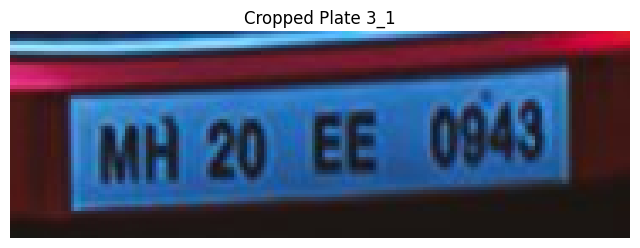

Cropped plate saved as: detected_plate_3_2.jpg


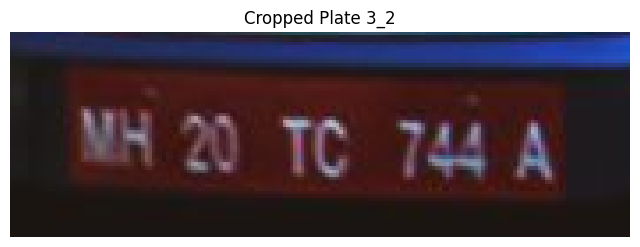

In [42]:
# Apply detection on all images
for idx, img in enumerate(images):
    result_img, cropped_plates, count = detect_license_plate(img)
    show_image(result_img, f"Image {idx+1} – Plates Detected: {count}")

    # Save cropped plates
    for i, plate in enumerate(cropped_plates):
        save_path = f"detected_plate_{idx+1}_{i+1}.jpg"
        cv2.imwrite(save_path, plate)
        print(f"Cropped plate saved as: {save_path}")
        show_image(plate, f"Cropped Plate {idx+1}_{i+1}")